In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
from numpy import mean

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from datetime import datetime, timedelta

#from sqlalchemy.ext.declarative import declarative_base
#Base = declarative_base()
#from sqlalchemy import Column, Integer, String, Float

In [6]:
# Setup the engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
connection = engine.connect()

In [7]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [8]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [10]:
#Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
# Assign the measurement and station classes to variables 

Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Display the row's columns and data in dictionary format
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x28bee413a60>,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0,
 'longitude': -157.8168,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US'}

In [13]:
# Use the session to query Station table and display the first 5 rows
for row in session.query(Station.longitude, Station.latitude, Station.id, Station.name, Station.station, Station.elevation ).limit(15).all():
    print(row)

(-157.8168, 21.2716, 1, 'WAIKIKI 717.2, HI US', 'USC00519397', 3.0)
(-157.8015, 21.4234, 2, 'KANEOHE 838.1, HI US', 'USC00513117', 14.6)
(-157.8374, 21.5213, 3, 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 'USC00514830', 7.0)
(-157.9751, 21.3934, 4, 'PEARL CITY, HI US', 'USC00517948', 11.9)
(-158.0111, 21.4992, 5, 'UPPER WAHIAWA 874.3, HI US', 'USC00518838', 306.6)
(-157.71139, 21.33556, 6, 'WAIMANALO EXPERIMENTAL FARM, HI US', 'USC00519523', 19.5)
(-157.84888999999998, 21.45167, 7, 'WAIHEE 837.5, HI US', 'USC00519281', 32.9)
(-157.9992, 21.3152, 8, 'HONOLULU OBSERVATORY 702.2, HI US', 'USC00511918', 0.9)
(-157.8025, 21.3331, 9, 'MANOA LYON ARBO 785.2, HI US', 'USC00516128', 152.4)


In [14]:
# Display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x28bee3b11f0>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397'}

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database

for row in session.query(Measurement.date, Measurement.id, Measurement.prcp, Measurement.station, Measurement.tobs).order_by(Measurement.id.desc()).limit(1).all():
    base_date = datetime.strptime(row[0],'%Y-%m-%d')
    print(base_date)

2017-08-23 00:00:00


# Exploratory Climate Analysis

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
date_table = []
prcp_table = []
station_table = []
temperature_table = []
compare_date = base_date - timedelta(days=365)
print(compare_date)
for row in session.query(Measurement.date,Measurement.prcp, Measurement.station, Measurement.tobs).filter(Measurement.date > compare_date):
    date_table.append(datetime.strptime(row[0],'%Y-%m-%d').date())
    prcp_table.append(row[1])
    station_table.append(row[2])
    temperature_table.append(row[3])
    print(row)


2016-08-23 00:00:00
('2016-08-24', 0.08, 'USC00519397', 79.0)
('2016-08-25', 0.08, 'USC00519397', 80.0)
('2016-08-26', 0.0, 'USC00519397', 79.0)
('2016-08-27', 0.0, 'USC00519397', 77.0)
('2016-08-28', 0.01, 'USC00519397', 78.0)
('2016-08-29', 0.0, 'USC00519397', 78.0)
('2016-08-30', 0.0, 'USC00519397', 79.0)
('2016-08-31', 0.13, 'USC00519397', 80.0)
('2016-09-01', 0.0, 'USC00519397', 81.0)
('2016-09-02', 0.0, 'USC00519397', 80.0)
('2016-09-03', 0.0, 'USC00519397', 79.0)
('2016-09-04', 0.03, 'USC00519397', 75.0)
('2016-09-05', None, 'USC00519397', 79.0)
('2016-09-06', None, 'USC00519397', 76.0)
('2016-09-07', 0.05, 'USC00519397', 76.0)
('2016-09-08', 0.0, 'USC00519397', 80.0)
('2016-09-09', 0.03, 'USC00519397', 79.0)
('2016-09-10', 0.0, 'USC00519397', 78.0)
('2016-09-11', 0.05, 'USC00519397', 76.0)
('2016-09-12', 0.0, 'USC00519397', 78.0)
('2016-09-13', 0.02, 'USC00519397', 78.0)
('2016-09-14', 1.32, 'USC00519397', 75.0)
('2016-09-15', 0.42, 'USC00519397', 79.0)
('2016-09-16', 0.06, 'US

In [17]:
# set up the date_table
date_table_df = pd.DataFrame(date_table)
date_table_df = date_table_df.rename({0:'date'}, axis='columns')
date_table_df.head()


,date
0,2016-08-24
1,2016-08-25
2,2016-08-26
3,2016-08-27
4,2016-08-28


In [18]:
# set up the prcp_table
prcp_table_df = pd.DataFrame(prcp_table)
prcp_table_df = prcp_table_df.rename({0:'prcp'}, axis='columns')
prcp_table_df.head()

,prcp
0,0.08
1,0.08
2,0.00
3,0.00
4,0.01


In [19]:
# combine the dates, set the index to date and sort by date.
combined_data_df = date_table_df.join(prcp_table_df)
#remove any null values
combined_data_df = combined_data_df.dropna()
combined_data_df.set_index('date', inplace=True)
combined_data_df_sorted = combined_data_df.sort_values(by='date')
combined_data_df_sorted

,prcp
date,
2016-08-24,0.08
2016-08-24,1.22
2016-08-24,2.28
2016-08-24,1.45
2016-08-24,2.15
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.08


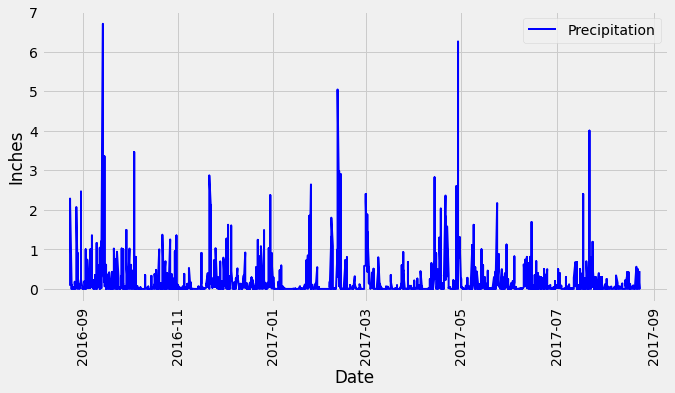

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10,5))

#plt.title(f"Average Salary by Title")
plt.xlabel("Date")
plt.ylabel("Inches")

#x_timepoints=combined_data_df_sorted[combined_data_df_sorted.index]
y_datapoints=combined_data_df_sorted['prcp']

plt.plot(y_datapoints, color="blue", label="Precipitation", linewidth=2)
leg = plt.legend()
plt.xticks(rotation=90)
plt.show()  


In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
combined_data_df_sorted.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [22]:
# Display the row's columns and data in dictionary format
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x28beedb00d0>,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0,
 'longitude': -157.8168,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US'}

In [23]:
# Design a query to show how many stations are available in this dataset?
print(f" No of Stations is: {session.query(Station.station).group_by(Station.station).count()}")
    

 No of Stations is: 9


In [24]:
all_stations = []
for row in session.query(Station.station).group_by(Station.station).all():
    print(row[0])
    all_stations.append(row[0])

USC00511918
USC00513117
USC00514830
USC00516128
USC00517948
USC00518838
USC00519281
USC00519397
USC00519523


In [25]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_id_table=[]
for row in session.query(Measurement.station,func.count(Measurement.prcp)).group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).all():
    station_id_table.append(row[0])
    print(row)

('USC00519281', 2772)
('USC00513117', 2696)
('USC00519397', 2685)
('USC00519523', 2572)
('USC00516128', 2484)
('USC00514830', 1937)
('USC00511918', 1932)
('USC00517948', 683)
('USC00518838', 342)


In [26]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
print(f"Precipitation Statistics for the most Active Station:")
print(f"-----------------------------------------------------")
for row in session.query(Measurement.station,func.min(Measurement.prcp), func.max(Measurement.prcp), func.avg(Measurement.prcp)).filter(Measurement.station == station_id_table[0]).group_by(Measurement.station):
    print(f" Station ID: {row[0]}, Lowest: {row[1]}, Highest: {row[2]}, Average: {'{:,.4f}'.format(row[3])} ")


Precipitation Statistics for the most Active Station:
-----------------------------------------------------
 Station ID: USC00519281, Lowest: 0.0, Highest: 9.64, Average: 0.2124 


In [27]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# set up the station_table & temperature_table
station_table_df = pd.DataFrame(station_table)
station_table_df = station_table_df.rename({0:'station'}, axis='columns')
station_table_df.head()
temperature_table_df = pd.DataFrame(temperature_table)
temperature_table_df = temperature_table_df.rename({0:'temperature'}, axis='columns')
temperature_table_df.head()


,temperature
0,79.0
1,80.0
2,79.0
3,77.0
4,78.0


In [28]:
# combine the dates, set the index to date and sort by date.
highest_number_df = date_table_df.join(prcp_table_df)
highest_number_comb_df = highest_number_df.join(station_table_df)
highest_number_comb_df = highest_number_comb_df.join(temperature_table_df)
highest_number_comb_df= highest_number_comb_df.loc[(station_table_df['station']==station_id_table[0])]
#highest_number_comb_df
#remove any null values
highest_number_comb_df = highest_number_comb_df.dropna()
#highest_number_comb_df
highest_number_comb_df.set_index('date', inplace=True)
highest_number_comb_df_sorted = highest_number_comb_df.sort_values(by='date')
highest_number_comb_df_sorted

,prcp,station,temperature
date,,,
2016-08-24,2.15,USC00519281,77.0
2016-08-25,0.06,USC00519281,80.0
2016-08-26,0.01,USC00519281,80.0
2016-08-27,0.12,USC00519281,75.0
2016-08-28,0.60,USC00519281,73.0
...,...,...,...
2017-08-14,0.00,USC00519281,77.0
2017-08-15,0.32,USC00519281,77.0
2017-08-16,0.12,USC00519281,76.0


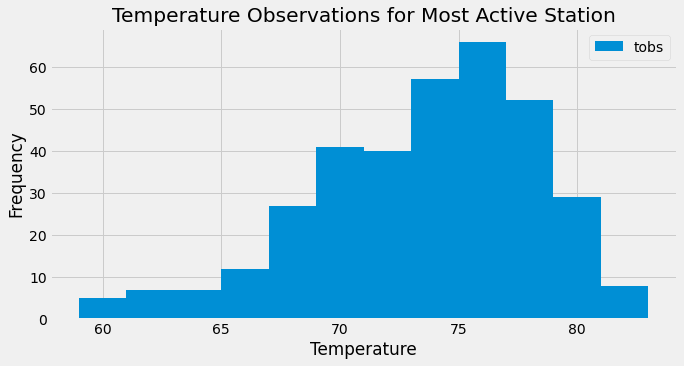

In [29]:
#Query the last 12 months of temperature observation data for this station and plot the results as a histogram

plt.figure(figsize=(10,5))
plt.title(f"Temperature Observations for Most Active Station")
plt.hist(highest_number_comb_df_sorted['temperature'], bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['tobs'])
plt.show()

## Bonus Challenge Assignment

## Temperature Analysis I

In [30]:
# Create a query that will calculate the monthly normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month)

def monthly_normals(date):
    """Monthly Normals.
    
    Args:
        date (str): A date string in the format '%m'
        
    Returns:
        A list of tuples containing the monthly normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m", Measurement.date) == date).all()
    
print(f" Monthly tmin, tavg, tmax for June",monthly_normals("06"))  #for June
print(f" Monthly tmin, tavg, tmax for December",monthly_normals("12"))  #for December

 Monthly tmin, tavg, tmax for June [(64.0, 74.94411764705882, 85.0)]
 Monthly tmin, tavg, tmax for December [(56.0, 71.04152933421226, 83.0)]


### Comments on Hawaii's weather - June vs December
It looks like the Temperatures for Hawaii will be on average 4.9 degrees cooler on average in December vs June. 
The minimum temperature is about 8 degrees lower in December ,whereas the top temperature is very similar with only 2 degrees difference.

In [31]:
# Create a query that will return temperature for a given month 
# 

def monthly_temps(date):
    """Monthly Normals.
    
    Args:
        date (str): A date string in the format '%m'
        
    Returns:
        A list of tuples containing the monthly normals, tmin, tavg, and tmax
    
    """
    
    sel = [Measurement.tobs]
    return session.query(*sel).filter(func.strftime("%m", Measurement.date) == date).all()
June_temps= monthly_temps("06")   
December_temps= monthly_temps("12")  


In [32]:
# Calculate Unpaired (independent)t-test statistics for June and December for Hawaii
stats.ttest_ind(June_temps,December_temps)

Ttest_indResult(statistic=array([31.60372399]), pvalue=array([3.9025129e-191]))

## Comments on the T-test
A unpaired t-test is appropriate since it is comparing two separate groups of figures, whereas a paired t-test is
lookin at differences within the same group.
With the pvalue < 0.05, we can conclude that the means are not the same, that there is a statistically signicant difference 
in the means.

## Temperature Analysis II

In [33]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
#print(calc_temps('2012-02-28', '2012-03-05'))
for row in (calc_temps('2017-02-28', '2017-03-15')):
    temp_min=row[0]
    temp_avg=row[1]
    temp_max=row[2]
print(f"Min temp: {temp_min}, Avg temp: {'{:,.2f}'.format(temp_avg)}, Max temp: {temp_max}")


Min temp: 62.0, Avg temp: 71.19, Max temp: 82.0


In [34]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
session=Session(engine)
Measurement = Base.classes.measurement
temp_min=0
for row in (calc_temps('2017-05-01','2017-05-10')):
    temp_min=row[0]
    temp_avg=row[1]
    temp_max=row[2]
print(f"Min temp: {temp_min}, Avg temp: {'{:,.2f}'.format(temp_avg)}, Max temp: {temp_max}")
session.close()

Min temp: 65.0, Avg temp: 75.12, Max temp: 80.0


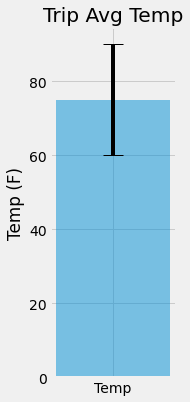

In [35]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

labels = ['Temp']
x_pos = np.arange(len(labels))
CTEs = [75.12]
error = [15]

fig, ax = plt.subplots()
fig.set_size_inches(2,6)
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('Temp (F)')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Trip Avg Temp')
ax.yaxis.grid(True)

In [36]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
# Trip dates are 28/2/2017 to 15/3/2017;
trip_start_date=datetime.strptime("2017-02-28",'%Y-%m-%d').date()-timedelta(days=365)
trip_end_date=datetime.strptime("2017-3-15",'%Y-%m-%d').date()-timedelta(days=365)
#print(start_date,end_date)

# Design a query to retrieve the last year's precipitation data for the proposed trip dates
trip_stats = []
for row in session.query(Measurement.station, \
                         Station.name, Station.latitude, Station.longitude,\
                         Station.elevation, func.sum(Measurement.prcp)).filter(Measurement.date >= trip_start_date).\
                        filter(Measurement.station==Station.station).filter(Measurement.date <= trip_end_date).\
                        group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()):
    trip_stats_dict={}
    trip_stats_dict["station"]=row[0]
    trip_stats_dict["name"]=row[1]
    trip_stats_dict["latitude"]=row[2]
    trip_stats_dict["longitude"]=row[3]
    trip_stats_dict["elevation"]=row[4]
    trip_stats_dict["prcp"]=row[5]
    trip_stats.append(trip_stats_dict)

trip_stats_df=pd.DataFrame(trip_stats)
trip_stats_df.sort_values(by=['prcp'],ascending=False)   


,station,name,latitude,longitude,elevation,prcp
0,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,1.43
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,1.26
2,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,1.20
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.65
4,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.53
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.27
6,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,NaN


In [37]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [38]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
# Use the start and end date to create a range of dates
normals=[]
trip_dates=[]
trip_dates.append(datetime.strptime("2017-02-28",'%Y-%m-%d').date())
cnt=0
for i in range(16):
    cnt+=1
    trip_dates.append(trip_dates[cnt-1] + timedelta(days=1))
# calculate the daily normals for your trip
# Strip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date
for i in range(len(trip_dates)):
    date_str=str(trip_dates[i])
    return_values=daily_normals(date_str[-5:])
    normals_dict={}
    normals_dict['tmin']=return_values[0][0]
    normals_dict['tavg']=return_values[0][1]
    normals_dict['tmax']=return_values[0][2]
    normals_dict['date']=trip_dates[i]
    normals.append(normals_dict)

normals_df=pd.DataFrame(normals)

In [39]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

normals_df.set_index('date', inplace=True)
normals_df_sorted = normals_df.sort_values(by='date')
normals_df_sorted

,tmin,tavg,tmax
date,,,
2017-02-28,65.0,70.655172,80.0
2017-03-01,64.0,70.032787,76.0
2017-03-02,61.0,70.366667,78.0
2017-03-03,60.0,70.068966,78.0
2017-03-04,57.0,69.272727,77.0
2017-03-05,60.0,67.890909,76.0
2017-03-06,60.0,69.203390,76.0
2017-03-07,60.0,69.172414,78.0
2017-03-08,59.0,68.724138,78.0


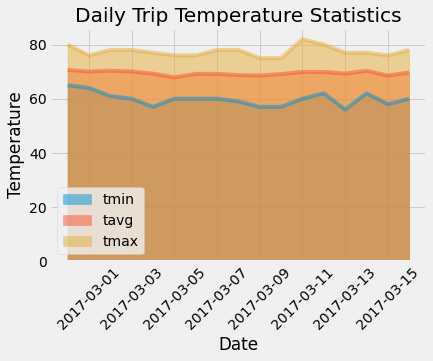

In [40]:
# Plot the daily normals as an area plot with `stacked=False`
ax = normals_df_sorted.plot.area(stacked=False)
plt.title(f"Daily Trip Temperature Statistics")
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.xticks(rotation=45);